<a href="https://colab.research.google.com/github/lilidl-nft/PyE/blob/main/a2308_TP1_DiLanzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TP 1: Probabilidad y Estadística para la Inteligencia Artificial**

**1)** De 10 monedas hay 8 monedas falsas, que tienen probabilidad 0,4 de mostrar cara al ser lanzadas. Si se toma una moneda al azar, se lanza 12 veces y en todas ellas se obtiene cara, ¿qué es más probable: que la moneda elegida sea justa o que esté cargada? Dar las probabilidades tanto de que la moneda elegida sea falsa como de que sea justa.


In [35]:
"""
Al inicio sabemos que la mayoría de las monedas son falsas (8/10).
Ese prior cambia el peso de la conclusión.
Bayes permite combinar:
- Probabilidades a priori (qué tan probable era cada hipótesis antes de ver nada)
- con la verosimilitud de la evidencia (qué tan compatible es lo que vimos con cada hipótesis).
"""

# Probabilidades a priori
p_J = 2/10  # probabilidad de elegir una moneda justa
p_F = 8/10  # probabilidad de elegir una moneda falsa

# Verosimilitudes: probabilidad de 12 caras seguidas
verosimilitud_J = 0.5**12
verosimilitud_F = 0.4**12

# Evidencia (denominador de Bayes)
evidencia = p_J * verosimilitud_J + p_F * verosimilitud_F

# Probabilidades posteriores
posterior_J = (p_J * verosimilitud_J) / evidencia
posterior_F = (p_F * verosimilitud_F) / evidencia

# Resultados
print(f"P(J|E) ≈ {posterior_J:.2f}  → Hay un {posterior_J:.0%} de probabilidad de que la moneda sea justa")
print(f"P(F|E) ≈ {posterior_F:.2f}  → Hay un {posterior_F:.0%} de probabilidad de que la moneda sea falsa")

print("""
Si bien empezar con 8/10 falsas favorece a las falsas,
la evidencia de 12 caras pesa mucho a favor de las justas,
porque 0.5^12 es bastante mayor que 0.4^12.
""")

P(J|E) ≈ 0.78  → Hay un 78% de probabilidad de que la moneda sea justa
P(F|E) ≈ 0.22  → Hay un 22% de probabilidad de que la moneda sea falsa

Si bien empezar con 8/10 falsas favorece a las falsas,
la evidencia de 12 caras pesa mucho a favor de las justas,
porque 0.5^12 es bastante mayor que 0.4^12.





---



**2)** Sean $X$ e $Y$ dos v.a. continuas con densidad conjunta:

$$
f_{X,Y}(x,y) =
\begin{cases}
K y, & 100x^2 \leq y \leq 10x, \\[6pt]
0,   & \text{en otro caso}.
\end{cases}
$$

## 2)
### **Soporte**

**En función de \(x\):**
$$
0<x\le 0.1, \qquad 100x^{2}\le y \le 10x.
$$
**En función de \(y\):**
$$
100x^{2}\le y\le 10x,\quad x\ge 0.
$$
$$
\frac{y}{10}\le x \le \frac{\sqrt{y}}{10},\qquad 0<y\le 1.
$$


### **Constante de normalización \(K\)**
$$
\begin{aligned}
1
&=\int_{0}^{0.1}\!\!\int_{100x^{2}}^{10x} K\,y\,dy\,dx \\
&=\int_{0}^{0.1}\frac{K}{2}\Big[(10x)^{2}-(100x^{2})^{2}\Big]\,dx \\
&=K\int_{0}^{0.1}\big(50x^{2}-5000x^{4}\big)\,dx \\
&=K\Big[\tfrac{50}{3}x^{3}-1000x^{5}\Big]_{0}^{0.1}
=K\!\left(\frac{1}{60}-\frac{1}{100}\right)
=K\cdot\frac{1}{150}.
\end{aligned}
$$

$$
K=150.
$$

### **Marginales**

**De \(X\):**
$$
\begin{aligned}
f_X(x)
&=\int_{100x^{2}}^{10x}\! 150\,y\,dy \\
&=150\cdot\frac{(10x)^{2}-(100x^{2})^{2}}{2} \\
&=7500\,x^{2}-750000\,x^{4},\qquad 0<x<0.1 .
\end{aligned}
$$
$$
f_X(x)=0 \quad \text{en otro caso.}
$$

**De \(Y\):** (usando los límites en \(x\) para cada \(y\))
$$
x \in \left[\frac{y}{10},\,\frac{\sqrt{y}}{10}\right],\qquad 0<y\le 1 .
$$
$$
\begin{aligned}
f_Y(y)
&=\int_{y/10}^{\sqrt{y}/10}\! 150\,y\,dx \\
&=150y\!\left(\frac{\sqrt{y}}{10}-\frac{y}{10}\right) \\
&=15\,(y^{3/2}-y^{2}),\qquad 0<y<1 .
\end{aligned}
$$
$$
f_Y(y)=0 \quad \text{en otro caso.}
$$


### **Condicionales**

**De \(Y\mid X=x\):**
$$
\begin{aligned}
f_{Y\mid X}(y\mid x)
&=\frac{f_{X,Y}(x,y)}{f_X(x)}
=\frac{150\,y}{7500x^{2}-750000x^{4}}
=\frac{y}{50x^{2}\,(1-100x^{2})},
\qquad 100x^{2}\le y\le 10x.
\end{aligned}
$$

**De \(X\mid Y=y\):**
$$
\begin{aligned}
f_{X\mid Y}(x\mid y)
&=\frac{f_{X,Y}(x,y)}{f_Y(y)}
=\frac{150\,y}{15\,(y^{3/2}-y^{2})}
=\frac{10}{\sqrt{y}-y},
\qquad \frac{y}{10}\le x\le \frac{\sqrt{y}}{10}.
\end{aligned}
$$

Como \(f_{X\mid Y}\) es constante en su intervalo:
$$
X\mid Y=y \sim \mathrm{Uniforme}\!\left[\frac{y}{10},\,\frac{\sqrt{y}}{10}\right].
$$

### **No independencia**

Para \((x,y)=(0.05\,0.3)\) (pertenece al soporte porque \(100x^{2}=0.25\) y \(10x=0.5\)):

$$
f_{X,Y}(0.05,0.3)=150\cdot 0.3=45.
$$

$$
f_X(0.05)=7500(0.05)^{2}-750000(0.05)^{4}
=18.75-4.6875=14.0625.
$$

$$
\sqrt{0.3}\approx 0.5477226,\qquad 0.3^{3/2}=0.3\sqrt{0.3}\approx 0.1643168.
$$

$$
f_Y(0.3)=15\big(0.3^{3/2}-0.3^{2}\big)\approx 15(0.1643168-0.09)\approx 1.1148.
$$

$$
f_X(0.05)\,f_Y(0.3)\approx 14.0625\times 1.1148 \approx 15.68 \neq 45.
$$

Luego \(X\) e \(Y\) no son independientes.

### **Medias condicionales e interpretación**

Como $X \mid Y=y \sim \mathrm{Uniforme}\!\left[\dfrac{y}{10},\,\dfrac{\sqrt{y}}{10}\right]$,
$$
\mathbb{E}[X \mid Y=y]
= \frac{1}{2}\!\left(\frac{y}{10}+\frac{\sqrt{y}}{10}\right)
= \frac{y+\sqrt{y}}{20}.
$$

Dado un $y$, los $x$ del intervalo geométrico son equiprobables
(uniforme); por eso la media es el punto medio entre $y/10$ y $\sqrt{y}/10$.

Para $Y \mid X=x$ (densidad $\propto y$ en $[100x^{2},\,10x]$),
$$
\mathbb{E}[Y \mid X=x]
= \frac{2}{3}\,\frac{(10x)^{3}-(100x^{2})^{3}}{(10x)^{2}-(100x^{2})^{2}}
= \frac{20x}{3}\,\frac{1-1000x^{3}}{1-100x^{2}},\qquad 0<x\le 0.1.
$$

Como la densidad condicional de $Y$ crece linealmente con $y$ en su
intervalo, la media queda sesgada hacia el límite superior $10x$.



---



**3)** Don Francisco es un pequeño comerciante de barrio que posee un supermercado, con el que sostiene a su familia. Uno de sus hijos, **Matías**, quien recién inicia a cursar la **Especialización en Inteligencia Artificial del LSE de la UBA**, le propone hacer un análisis de las ventas durante el año anterior, con el fin de hacer pronósticos para el año siguiente, lo que a Don Francisco le parece buena idea. Don Francisco le entrega a Matías el cuaderno donde tiene registrado el valor total de sus ventas en cada día del año. Con esta información, Matías construye una tabla en la cual la primera columna corresponde a la fecha y la segunda corresponde al monto de las ventas, en dólares para evitarse dolores de cabeza con la inflación. Matías no se siente muy seguro de la tarea a realizar, así que les pide ayuda a ustedes para abordar el problema. A partir del archivo de datos correspondiente a su grupo, determine una **función empírica de distribución** y una **aproximación a la función de densidad** de las ventas del supermercado de Don Francisco para cada año de registro (**2021, 2022 y 2023**).

In [36]:
# Descarga de librerias necesarias.
!pip -q install pandas openpyxl requests

import requests, io, pandas as pd

SHEET_ID = "1Odr7gbGc1YY3xUeJEf-FGjms1L0yxk-f"
xlsx_url  = f"https://docs.google.com/spreadsheets/d/{SHEET_ID}/export?format=xlsx"

# Descarga en memoria y lee como Excel
resp = requests.get(xlsx_url)
resp.raise_for_status()

df = pd.read_excel(io.BytesIO(resp.content))
df.head()

,Fecha,Ventas
0,2021-01-01,15294.317738
1,2021-01-02,15868.651269
2,2021-01-03,17208.274959
3,2021-01-04,16827.968832
4,2021-01-05,18969.807832


In [37]:
import numpy as np

# Normalizar nombres y detectar columnas
df.columns = [c.strip().lower() for c in df.columns]

# si tus nombres son distintos, agregalos a los sets
fecha_col = next(c for c in df.columns if c in ("fecha","date","dia","día"))
monto_col = next(c for c in df.columns if c in ("ventas","venta","monto","importe","amount","valor"))

df = df[[fecha_col, monto_col]].rename(columns={fecha_col:"fecha", monto_col:"monto"})

# convertir tipos
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce", dayfirst=True)

# si tus montos vienen como texto con coma decimal, descomentá estas dos líneas:
# df["monto"] = (df["monto"].astype(str).str.replace(".","", regex=False).str.replace(",",";", regex=False).str.replace(";",".", regex=False))
df["monto"] = pd.to_numeric(df["monto"], errors="coerce")

# limpiar y derivar año
df = df.dropna(subset=["fecha","monto"]).sort_values("fecha").reset_index(drop=True)
df["anio"] = df["fecha"].dt.year

# filtrar 2021-2023 (si hay otros años en la hoja)
df = df[df["anio"].isin([2021, 2022, 2023])].copy()
df.head()


,fecha,monto,anio
0,2021-01-01,15294.317738,2021
1,2021-01-02,15868.651269,2021
2,2021-01-03,17208.274959,2021
3,2021-01-04,16827.968832,2021
4,2021-01-05,18969.807832,2021


In [38]:
# Resumen por año (n, media, p25/mediana/p75)
rows = []
for y in sorted(df["anio"].unique()):
    s = df.loc[df["anio"]==y, "monto"]
    rows.append({
        "año": y, "n_dias": s.size,
        "promedio": s.mean(), "desvio_std": s.std(ddof=1),
        "min": s.min(), "p25": s.quantile(0.25),
        "mediana": s.median(), "p75": s.quantile(0.75), "max": s.max()
    })
summary = pd.DataFrame(rows).round(2)
summary


,año,n_dias,promedio,desvio_std,min,p25,mediana,p75,max
0,2021,365,20894.72,2990.40,10089.52,19040.25,21052.89,23057.93,28811.97
1,2022,365,20719.26,3012.40,11626.76,18734.12,20903.08,22721.40,28190.79
2,2023,365,20862.69,2986.63,12688.05,18925.12,20922.34,23003.99,27819.34


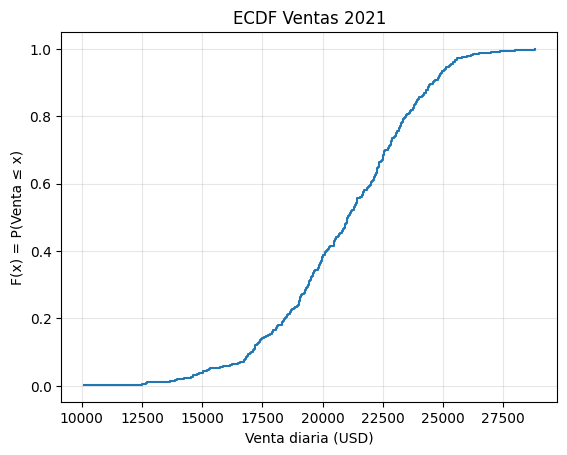

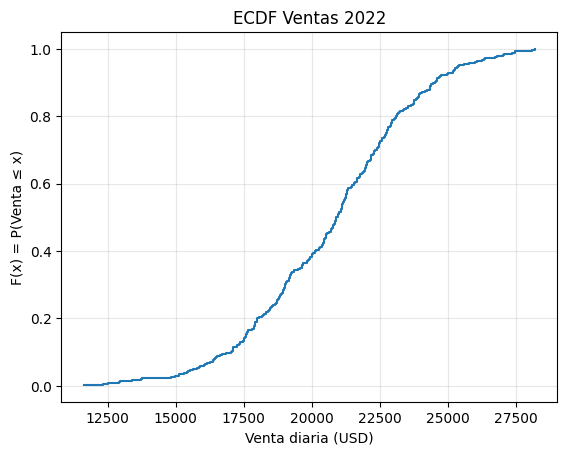

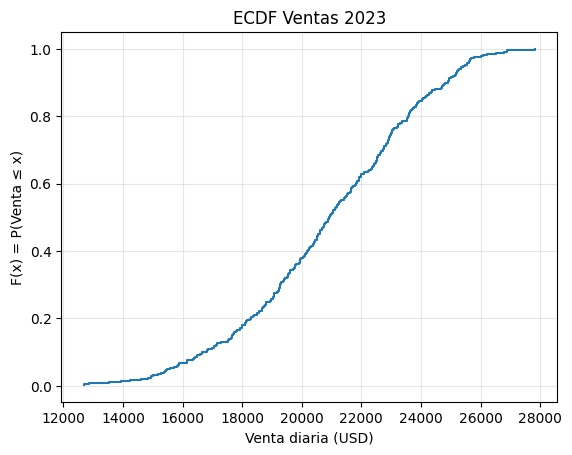

In [39]:
# ECDF (Función empírica de distribución) por año.
import matplotlib.pyplot as plt

def ecdf(values: np.ndarray):
    x = np.sort(values)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

import pathlib, os
out = pathlib.Path("/content/salidas"); out.mkdir(exist_ok=True)

for y in sorted(df["anio"].unique()):
    vals = df.loc[df["anio"]==y, "monto"].values
    x_ecdf, y_ecdf = ecdf(vals)
    pd.DataFrame({"venta": x_ecdf, "ecdf": y_ecdf}).to_csv(out / f"ecdf_{y}.csv", index=False)

    plt.figure()
    plt.step(x_ecdf, y_ecdf, where="post")
    plt.title(f"ECDF Ventas {y}")
    plt.xlabel("Venta diaria (USD)"); plt.ylabel("F(x) = P(Venta ≤ x)")
    plt.grid(True, alpha=0.3)
    plt.savefig(out / f"ecdf_{y}.png", dpi=150, bbox_inches="tight")
    plt.show()

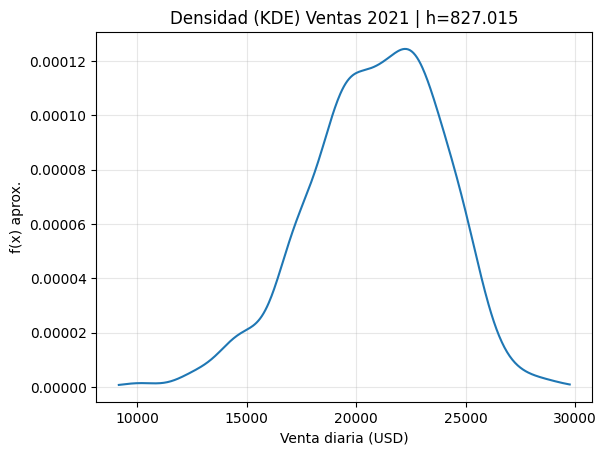

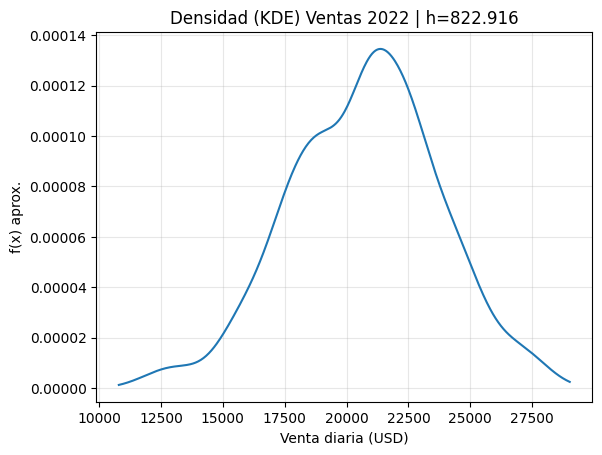

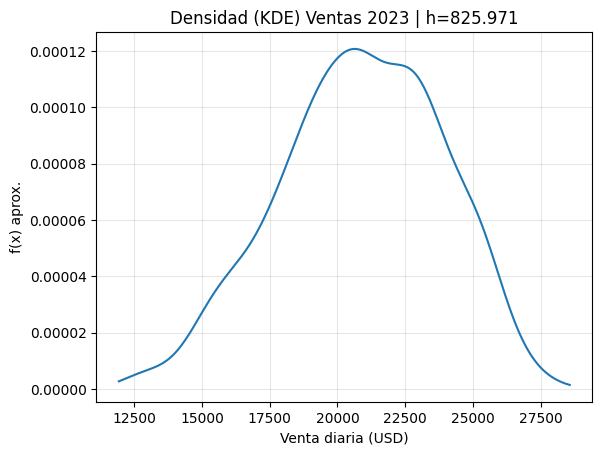

In [40]:
# KDE (densidad suavizada) por año
import math

def silverman_bandwidth(x: np.ndarray) -> float:
    x = np.asarray(x); n = x.size
    if n < 2: return 1.0 if n==1 else 0.1
    std = np.std(x, ddof=1); iqr = np.percentile(x,75)-np.percentile(x,25)
    sigma = min(std, iqr/1.34) if (std>0 and iqr>0) else max(std, iqr/1.34, 1.0)
    h = 0.9 * sigma * (n ** (-1/5))
    return h if (np.isfinite(h) and h>0) else (std/10 if std>0 else 1.0)

def kde_gaussiana(values: np.ndarray, grid_points=512, extend_ratio=0.05):
    x = np.asarray(values)
    xmin, xmax = float(np.min(x)), float(np.max(x))
    span = xmax - xmin if xmax>xmin else 1.0
    lo, hi = xmin - extend_ratio*span, xmax + extend_ratio*span
    grid = np.linspace(lo, hi, grid_points)
    h = silverman_bandwidth(x)

    inv_sqrt_2pi = 1.0 / math.sqrt(2*math.pi)
    diffs = (grid[:, None] - x[None, :]) / h
    dens = (inv_sqrt_2pi * np.exp(-0.5*diffs**2)).mean(axis=1) / h
    return grid, dens, h

for y in sorted(df["anio"].unique()):
    vals = df.loc[df["anio"]==y, "monto"].values
    if len(vals) < 2:
        print(f"[Aviso] {y}: muy pocos datos para KDE.")
        continue

    grid, dens, h = kde_gaussiana(vals)
    pd.DataFrame({"venta": grid, "densidad_aprox": dens}).to_csv(out / f"kde_{y}.csv", index=False)

    plt.figure()
    plt.plot(grid, dens)
    plt.title(f"Densidad (KDE) Ventas {y} | h={h:.3f}")
    plt.xlabel("Venta diaria (USD)"); plt.ylabel("f(x) aprox.")
    plt.grid(True, alpha=0.3)
    plt.savefig(out / f"kde_{y}.png", dpi=150, bbox_inches="tight")
    plt.show()


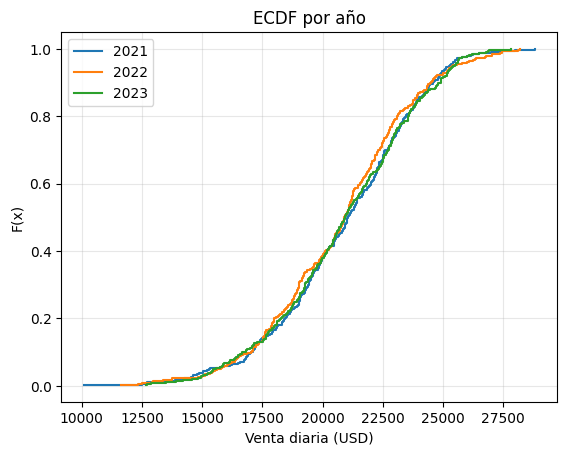

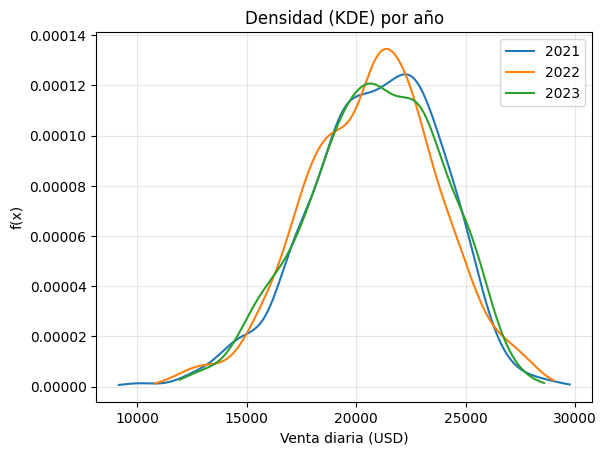

In [41]:
# Comparar años en el mismo grafico.
# ECDFs juntas
plt.figure()
for y in sorted(df["anio"].unique()):
    x_ecdf, y_ecdf = ecdf(df.loc[df["anio"]==y, "monto"].values)
    plt.step(x_ecdf, y_ecdf, where="post", label=str(y))
plt.title("ECDF por año"); plt.xlabel("Venta diaria (USD)"); plt.ylabel("F(x)")
plt.grid(True, alpha=0.3); plt.legend(); plt.show()

# KDEs juntas
plt.figure()
for y in sorted(df["anio"].unique()):
    vals = df.loc[df["anio"]==y, "monto"].values
    if len(vals) < 2: continue
    grid, dens, _ = kde_gaussiana(vals)
    plt.plot(grid, dens, label=str(y))
plt.title("Densidad (KDE) por año"); plt.xlabel("Venta diaria (USD)"); plt.ylabel("f(x)")
plt.grid(True, alpha=0.3); plt.legend(); plt.show()


In [42]:
# Estadísticas por año.
def stats_por_anio(df):
    rows = []
    for y in sorted(df["anio"].unique()):
        s = df.loc[df["anio"]==y, "monto"].dropna()
        if s.empty:
            continue
        rows.append({
            "año": y,
            "n_dias": int(s.size),
            "media": float(s.mean()),
            "mediana": float(s.median()),
            "std": float(s.std(ddof=1)) if s.size>1 else 0.0,
            "p10": float(s.quantile(0.10)),
            "p25": float(s.quantile(0.25)),
            "p75": float(s.quantile(0.75)),
            "p90": float(s.quantile(0.90)),
            "p95": float(s.quantile(0.95)),
            "p99": float(s.quantile(0.99)),
            "min": float(s.min()),
            "max": float(s.max())
        })
    st = pd.DataFrame(rows).set_index("año").sort_index()
    st["IQR"] = st["p75"] - st["p25"]
    st["CV"]  = st["std"] / st["media"]
    return st

st = stats_por_anio(df)

# Deltas interanuales (si hay varios años)
def yoy(col):
    return st[col].diff().rename(f"{col}_YoY")

yoy_cols = []
for col in ["mediana", "media", "p90", "p95", "IQR", "CV"]:
    if col in st.columns:
        st[f"{col}_YoY"] = st[col].diff()
        yoy_cols.append(f"{col}_YoY")

# Tomar el p90-2021 como umbral histórico y medir qué % de días de 2022/2023 lo superan.
pct_supera_p90_2021 = {}
if 2021 in st.index:
    th = st.loc[2021, "p90"]
    for y in st.index:
        s = df.loc[df["anio"]==y, "monto"].dropna()
        if s.empty:
            pct_supera_p90_2021[y] = np.nan
        else:
            pct_supera_p90_2021[y] = float((s >= th).mean())

# Helper para formatear moneda (USD).
def usd(x):
    return "${:,.0f}".format(x)

def pct(x):
    return "{:.1f}%".format(100*x)

# Informe en texto.
lines = []
lines.append("# Reporte de conclusiones")
lines.append("")

# Nivel típico (mediana)
# Usar la MEDIANA como referencia de "día normal" (target base).
# - Más robusta que la media frente a días atípicos.
# - La variación interanual (Δ) indica si el "piso" del negocio sube o baja.
lines.append("## 1) Nivel típico (mediana)")
for y in st.index:
    lines.append(f"- {y}: mediana = {usd(st.loc[y,'mediana'])}")
if len(st) > 1:
    for y in st.index[1:]:
        d = st.loc[y, "mediana_YoY"]
        signo = "↑" if d>0 else ("↓" if d<0 else "→")
        lines.append(f"  - Δ vs {y-1}: {signo} {usd(abs(d))}")

lines.append("Mediana ~$21k sostenida en 2021–2023, con leve baja en 2022 y leve rebote en 2023 (≈ +$19 vs 2022).")
lines.append("Negocio estable en el “día normal”; se puede usar la mediana como meta base diaria y referencia para dotación estándar.")
lines.append("")

# Dispersión (IQR y CV)
# - IQR (p75 - p25): rango de “la mitad central” de los días. Sirve para planificar inventario y caja.
# - CV (std/mean): volatilidad relativa. Útil para staffing y riesgos operativos.
# - Δ YoY ayuda a ver si el negocio se volvió más estable (↓) o más errático (↑).
lines.append("## 2) Dispersión")
for y in st.index:
    lines.append(f"- {y}: IQR = {usd(st.loc[y,'IQR'])}, CV = {st.loc[y,'CV']:.2f}")
if len(st) > 1:
    for y in st.index[1:]:
        d_iqr = st.loc[y, "IQR_YoY"]; d_cv = st.loc[y, "CV_YoY"]
        si = "↑" if d_iqr>0 else ("↓" if d_iqr<0 else "→")
        sc = "↑" if d_cv>0  else ("↓" if d_cv<0  else "→")
        lines.append(f"  - Δ vs {y-1}: IQR {si} {usd(abs(d_iqr))}, CV {sc} {abs(d_cv):.2f}")

lines.append("IQR ~ $4k y CV ~ 0.14–0.15, casi sin cambios. La variabilidad es controlada y predecible.")
lines.append("Se podría dimensionar un colchón con el IQR y buscar bajar el CV mediante acciones en días valle.")
lines.append("")

# Sesgo de la distribución (media vs mediana)
# - Si MEDIA > MEDIANA ⇒ "cola derecha": pocos días muy altos empujan el promedio.
# - Implicancia: cuidado con fijar metas usando la media (puede ser optimista).
# - Acciones: suavizar demanda (promos en días valle) para depender menos de picos
lines.append("## 3) Sesgo de la distribución")
for y in st.index:
    skew_dir = "cola derecha (días muy altos empujan la media)" if st.loc[y,"media"]>st.loc[y,"mediana"] else "sin cola derecha marcada"
    lines.append(f"- {y}: media = {usd(st.loc[y,'media'])} vs mediana = {usd(st.loc[y,'mediana'])} ⇒ {skew_dir}")
lines.append("Media ≈ Mediana en los tres años. Los resultados no dependen de pocos picos y las metas no se aumentan por outliers.")
lines.append("")

# Días pico (p90/p95/máx)
# - p90/p95: umbrales para definir “día alto” y “día muy alto”.
# - Máx/p95: qué tan extremos son los picos (riesgo de ruptura de stock o sobrecarga).
# - Uso: dimensionar personal/stock en fechas pico y planificar promociones/control de demanda.
lines.append("## 4) Días pico")
for y in st.index:
    lines.append(f"- {y}: p90 = {usd(st.loc[y,'p90'])}, p95 = {usd(st.loc[y,'p95'])}, máx = {usd(st.loc[y,'max'])} (ratio máx/p95 = {st.loc[y,'max']/st.loc[y,'p95']:.2f}×)")

lines.append("p90 ~ $24.6–24.9k, p95 ~ $25.2–25.4k; máx/p95 ≈ 1.09–1.14×.")
lines.append("Los picos son manejables, no extremos.")
lines.append("Se podria desarrollar un plan para los mismos (más cajas/personal/reposición) cuando el pronóstico ≥ p90 y un refuerzo mayor si ≥ p95.")
lines.append("")

# Mejora del mix (vs p90 de 2021)
# - Mide la “calidad del crecimiento”: no solo picos aislados, sino MÁS días buenos.
# - Indicador fácil de comunicar: % de días del año Y que superan el p90 de 2021.
# - Útil para objetivos comerciales y justificar inversión operativa.
lines.append("## 5) Mejora del mix (vs p90 de 2021)")
if 2021 in st.index:
    th = st.loc[2021,"p90"]
    lines.append(f"- Umbral p90 2021: {usd(th)}")
    for y in st.index:
        val = pct_supera_p90_2021.get(y, np.nan)
        if pd.isna(val):
            lines.append(f"  - {y}: s/datos")
        else:
            lines.append(f"  - {y}: {pct(val)} de los días superan el p90 de 2021")
else:
    lines.append("- No hay 2021 para comparar.")

lines.append("En 2023 mejora la “calidad” (más días buenos que el umbral 2021). Se debe seguir subiendo ese % más que buscar máximos aislados.")
lines.append("")

lines.append("## Conclusión para Don francisco y Matias:")
lines.append("Tienen un negocio estable, con variabilidad predecible y picos controlables. Si operan con la mediana como base, usando p90/p95 como gatillos operativos y fijando el objetivo de")
lines.append("subir el % de días ≥ p90-2021 (más días buenos constantes) mientras bajan IQR/CV suavizando los valles, seguiran operando por varios años más.")

# Mostrar tabla y reporte.
display(st.round(2))
print("\n".join(lines))


,n_dias,media,mediana,std,p10,p25,p75,p90,p95,p99,min,max,IQR,CV,mediana_YoY,media_YoY,p90_YoY,p95_YoY,IQR_YoY,CV_YoY
año,,,,,,,,,,,,,,,,,,,,
2021,365,20894.72,21052.89,2990.40,17057.75,19040.25,23057.93,24570.35,25241.12,26674.54,10089.52,28811.97,4017.68,0.14,NaN,NaN,NaN,NaN,NaN,NaN
2022,365,20719.26,20903.08,3012.40,17042.66,18734.12,22721.40,24493.86,25377.61,27391.87,11626.76,28190.79,3987.27,0.15,-149.80,-175.46,-76.49,136.49,-30.41,0.0
2023,365,20862.69,20922.34,2986.63,16714.82,18925.12,23003.99,24864.93,25424.04,26604.56,12688.05,27819.34,4078.88,0.14,19.26,143.43,371.07,46.43,91.60,-0.0


# Reporte de conclusiones

## 1) Nivel típico (mediana)
- 2021: mediana = $21,053
- 2022: mediana = $20,903
- 2023: mediana = $20,922
  - Δ vs 2021: ↓ $150
  - Δ vs 2022: ↑ $19
Mediana ~$21k sostenida en 2021–2023, con leve baja en 2022 y leve rebote en 2023 (≈ +$19 vs 2022).
Negocio estable en el “día normal”; se puede usar la mediana como meta base diaria y referencia para dotación estándar.

## 2) Dispersión
- 2021: IQR = $4,018, CV = 0.14
- 2022: IQR = $3,987, CV = 0.15
- 2023: IQR = $4,079, CV = 0.14
  - Δ vs 2021: IQR ↓ $30, CV ↑ 0.00
  - Δ vs 2022: IQR ↑ $92, CV ↓ 0.00
IQR ~ $4k y CV ~ 0.14–0.15, casi sin cambios. La variabilidad es controlada y predecible.
Se podría dimensionar un colchón con el IQR y buscar bajar el CV mediante acciones en días valle.

## 3) Sesgo de la distribución
- 2021: media = $20,895 vs mediana = $21,053 ⇒ sin cola derecha marcada
- 2022: media = $20,719 vs mediana = $20,903 ⇒ sin cola derecha marcada
- 2023: media = $20,863 vs mediana = $20,922 ⇒ sin co